In [1]:
import sys
import os
sys.path.append("..")
from diachr.diachromatic_interaction_set import DiachromaticInteractionSet
from diachr.diachromatic_interaction import DiachromaticInteraction

## Implement `CHCTadViz`

`CHCTadViz` is implemented here:

In [2]:
from diachr.CHCTadViz import CHCTadViz

Once the data has been loaded and grouped, any region can be visualized in a reasonable amount of time.

## Showing baits

In [3]:
# A test file with baits is here
BAIT_BED_FILE = '/Users/hansep/PycharmProjects/diachrscripts/tests/data/CHCTadViz_b_test_file.bed'

## Basics of usage

For demonstration purposes, we have prepared an interaction file with 44 interactions and a BED file with five TAD regions. A class `CHCTadViz` obejct is created by passing these two files to the constructor.

In [4]:
INTERACTION_FILE = '/Users/hansep/PycharmProjects/diachrscripts/tests/data/CHCTadViz_i_test_file.tsv'
TAD_BED_FILE = '/Users/hansep/PycharmProjects/diachrscripts/tests/data/CHCTadViz_t_test_file.bed'
visualizer = CHCTadViz(i_file=INTERACTION_FILE, t_file=TAD_BED_FILE, b_file=BAIT_BED_FILE, verbose=True)

[INFO] Initializing DirectedTadVisualizer object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr10: 44 interactions
	[INFO] ... done.
	[INFO] Reading TAD regions and group them by chromosomes ...
		chr10: 5 TADs
	[INFO] ... done.
	[INFO] Reading baited digest regions and group them by chromosomes ...
		chr10: 5 Baits
	[INFO] ... done.
[INFO] ... done.


The function `CHCTadViz.create_visualization()` can be used to visualize specific region. The only parameters that are required are the genomic coordinates. Before a visualization, is created, the following steps are carried out:

1. First, all interactions that are located completely within the region to be visualized are extracted.

2. These interactions can be filtered by interaction category, enrichment status and HT tag. By default, the interactions are not filtered.

3. For the remaining interactions, the quantiles `0.1` to `1.0` are determined. These are used to represent interactions depending on their total read pair counts. For instance, in this example, all interactions with a read pair count smaller or equal `5` will be shown with a transparency of `0.1`.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX', 'DI', 'UIR', 'UI']
		[INFO] Enrichment status:
			['NE', 'EN', 'EE', 'NN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			44
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 5.3  9.6 11.9 14.  16.  18.  20.  22.4 26.7 30. ]
[INFO] ... done.


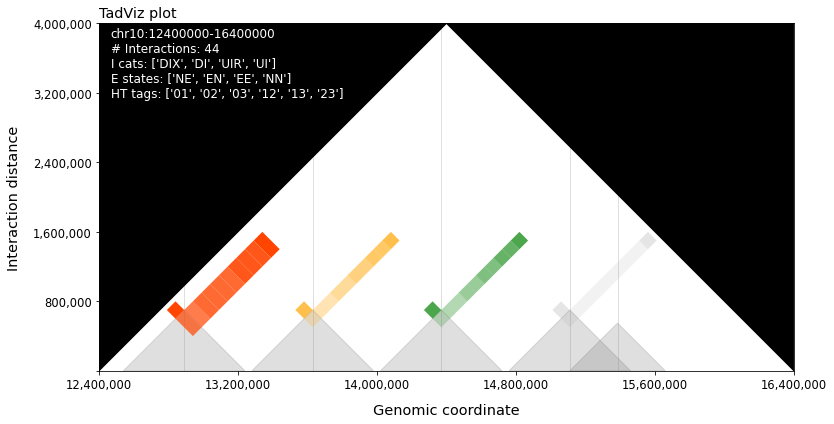

In [5]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end)

In priciple, this plot corresponds to a typical represenation of Hi-C interactions. The genomic coordinates are plotted on the x-axis and each colored tetragon in the triangle above represents an interaction between two genomic regions. For Hi-C data, the interactions are typically grouped in bins of the same size, so that all tetragon are squares.

For this plot, the tetragons can also be rectangular. Interactions from different categories are shown in different colors (`DIX` in `orangered`, `DI` in `orange`, `UIR` in `green` and `UI` in `gray`). For this example, we have assigned the read pair numbers of interactions in a linearly decreasing manner. `DIX` interactions have between `21` and `30` read pairs per interaction, both `DI` and `UIR` interactions between `20` and `11` and `UI` interactions between `1` and `10`.

The TAD regions are shown as gray triangles that have a certain degree of transparency. In cases where TAD regions for different celltypes are loaded, TAD regions can also overlap. Due to the transparency, regions covered by multiple TADs appear as darker triangles.

The interaction within the region to be visualized can be filtered. For instance, the folowing plot only contains `DI` and `UIR` interactions for which the left digest was selected for enrichment (`EN`).

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			20
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[11.9 12.8 13.7 14.6 15.5 16.4 17.3 18.2 19.1 20. ]
[INFO] ... done.


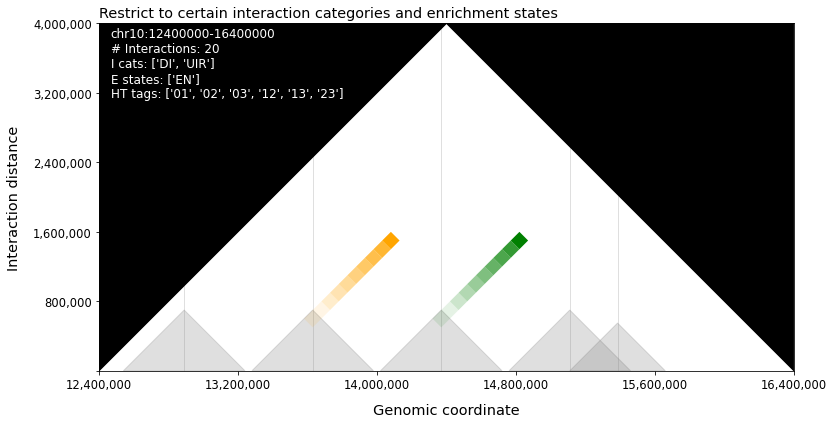

In [6]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI','UIR'],
                                enr_cat_list = ['EN'],
                                plot_title = 'Restrict to certain interaction categories and enrichment states')

Previously, the interactions are assigned colors according to their category. In the following plot, the interactions are colored according to their HT tags. The colors are assigned as follows:

```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			20
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[11.9 12.8 13.7 14.6 15.5 16.4 17.3 18.2 19.1 20. ]
[INFO] ... done.


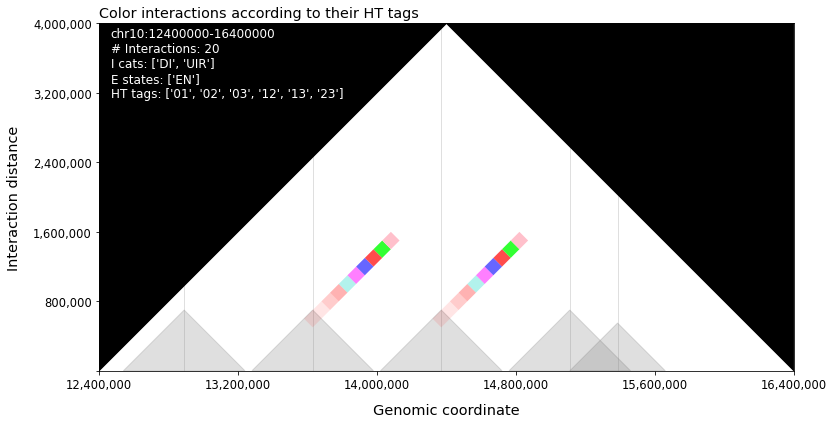

In [7]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI','UIR'],
                                enr_cat_list = ['EN'],
                                color_i_cats = False,
                                plot_title = 'Color interactions according to their HT tags')

The interaction can als be filtered based on their HT tag. The following plot shows only interactions with the tags `01` (`pink`), `02` (`red`) and `03` (`lime`).

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03']
		[INFO] Number interactions:
			14
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[11.3 12.  12.9 13.2 14.  17.2 18.1 19.  19.7 20. ]
[INFO] ... done.


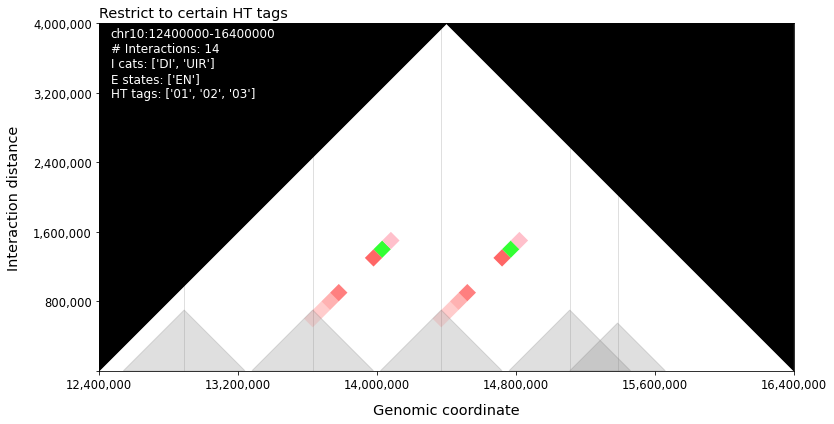

In [10]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI','UIR'],
                                enr_cat_list = ['EN'],
                                color_i_cats = False,
                                ht_tag_list = ['01','02','03'],
                                plot_title = 'Restrict to certain HT tags')

## Visualization of capture Hi-C data

### Input data

There is one CHC dataset for each of the 17 cell types and, for eight of the cell types, there are HC data and TAD boundaries.

In [3]:
CELL_TYPE_SHORT = 'MK'            # Has HC data
#CELL_TYPE_SHORT = 'ERY'           # Has HC data
#CELL_TYPE_SHORT = 'NEU'           # Has HC data
#CELL_TYPE_SHORT = 'MON'           # Has HC data
#CELL_TYPE_SHORT = 'MAC_M0'        # Has HC data
#CELL_TYPE_SHORT = 'MAC_M1'
#CELL_TYPE_SHORT = 'MAC_M2'
#CELL_TYPE_SHORT = 'EP'
#CELL_TYPE_SHORT = 'NB'            # Has HC data
#CELL_TYPE_SHORT = 'TB'
#CELL_TYPE_SHORT = 'FOET'
#CELL_TYPE_SHORT = 'NCD4'          # Has HC data
#CELL_TYPE_SHORT = 'TCD4'
#CELL_TYPE_SHORT = 'NACD4'
#CELL_TYPE_SHORT = 'ACD4'
#CELL_TYPE_SHORT = 'NCD8'          # Has HC data
#CELL_TYPE_SHORT = 'TCD8'

Load one of the eight BED files with the published TADs or a BED file with TADs from all eight cell types.

In [4]:
TAD_BED_FILE = '../additional_files/javierre_2016/tad_regions_hg38/hglft_genome_TADs_' + CELL_TYPE_SHORT + '_hg38.bed'
TAD_BED_FILE = '../additional_files/javierre_2016/tad_regions_hg38/all_tad_regions.bed'

Load the BED file with all regions of baited digests.

In [5]:
BAIT_BED_FILE = '/Users/hansep/PycharmProjects/diachrscripts/additional_files/javierre_2016/baited_digest_regions_hg38/Digest_Human_HindIII_baits_e75_ID.baitmap.hg38.bed'

Load an interaction file that was created with `DICer`.

In [29]:
PROTOCOL = 'CHC'
MIN_I_DIST = '20000'
FDR = '01'
RPC_RULE = 'ht'
if PROTOCOL == 'CHC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/CHC/JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_CHC_RALT_' + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/HC/' + MIN_I_DIST + '/JAV_' + CELL_TYPE_SHORT + '_HC_RALT_' + MIN_I_DIST + '_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_HC_RALT_'  + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC_POOLED':
    INTERACTION_FILE = '../DICer_interactions/HT/FDR0' + FDR + '/HC/20000/JAV_ALL_HC_RALL_ALT_20000_ht_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + RPC_RULE.lower()

# Uncomment one of the following lines for development
#INTERACTION_FILE = '/Users/robinp/Downloads/JAV_MK_RALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions.tsv.gz'

#INTERACTION_FILE = 'HT001_FILTER_2' + '/' + CELL_TYPE_SHORT + '_filtered_interaction_set.tsv.gz'
#OUT_PREFIX = CELL_TYPE_SHORT + 'HT001_FILTER_2'


# Small files for chromosome 'chr10' only
#INTERACTION_FILE = '/Users/hansep/PycharmProjects/diachrscripts/DICer_interactions/HT/FDR005/CHC/JAV_MAC_M0_RALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions_chr10.tsv.gz'
#INTERACTION_FILE = '/Users/hansep/PycharmProjects/diachrscripts/DICer_interactions/HT/FDR001/CHC/JAV_MAC_M0_RALT_20000_ht_fdr0.01_evaluated_and_categorized_interactions_chr10.tsv.gz'

In [30]:
visualizer = CHCTadViz(i_file=INTERACTION_FILE, t_file=TAD_BED_FILE, b_file=BAIT_BED_FILE, verbose=True)

[INFO] Initializing DirectedTadVisualizer object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr1: 598,046 interactions
		chr11: 354,002 interactions
		chr4: 309,656 interactions
		chr6: 363,262 interactions
		chr5: 354,305 interactions
		chr2: 490,432 interactions
		chrX: 154,641 interactions
		chr9: 238,366 interactions
		chr12: 326,426 interactions
		chr10: 265,812 interactions
		chr3: 420,267 interactions
		chr14: 218,642 interactions
		chr13: 155,564 interactions
		chr8: 274,319 interactions
		chr22: 75,687 interactions
		chr19: 114,161 interactions
		chr18: 112,301 interactions
		chr7: 278,988 interactions
		chr16: 130,929 interactions
		chr17: 198,701 interactions
		chr21: 74,629 interactions
		chr20: 140,042 interactions
		chr15: 170,694 interactions
		chrY: 909 interactions
	[INFO] ... done.
	[INFO] Reading TAD regions and group them by chromosomes ...
		chr1: 2,181 TADs
		chr10: 1,055 TADs
		chr11: 1,244 TADs
		chr12: 1,224 TADs
		chr13: 679 TADs
		ch

### Compare interaction categories

First we show all interaction categories in one plot. But we restrict to interactions in which only one of the two digests was selected for enrichment (`NE` or `EN`). For the capture Hi-C datasets shown here, these interactions account for more than 90% of all interactions.

In [27]:
chrom = 'chr10'
begin = 13000000
end = begin + 2500000
d_radius = 10000

In [31]:
chrom = 'chr11'
begin = 75715230 - 1000000
end = 75715230 + 1000000
d_radius = 10000

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 4,732 interactions in range:
		chr11:74715230-76715230
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX', 'DI', 'UIR', 'UI']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			517
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 8.  9. 11. 12. 14. 16. 19. 24. 31. 95.]
[INFO] ... done.


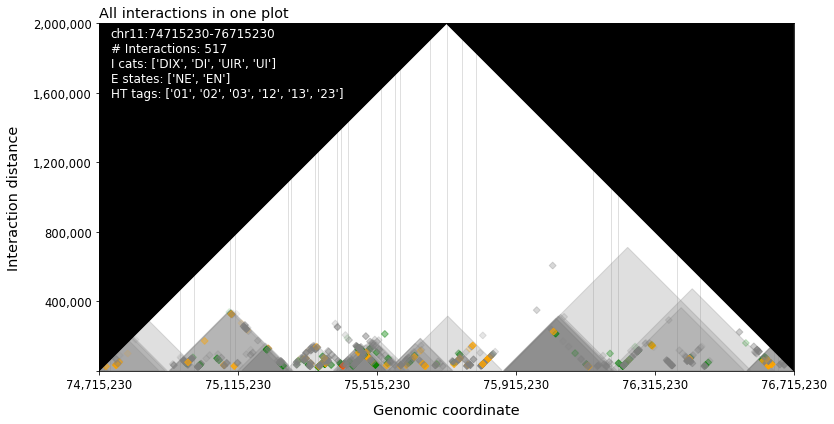

In [19]:
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DIX', 'DI', 'UIR', 'UI'],
                                enr_cat_list = ['NE','EN'],
                                d_radius = d_radius,
                                plot_title = 'All interactions in one plot')

Creating plots for: chr2:43000000-44000000
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plots for: chr2:43500000-44500000
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plots for: chr2:44000000-45000000
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plots for: chr2:44500000-45500000
[ERROR] After filtering, there are no interactions left to be visualized!


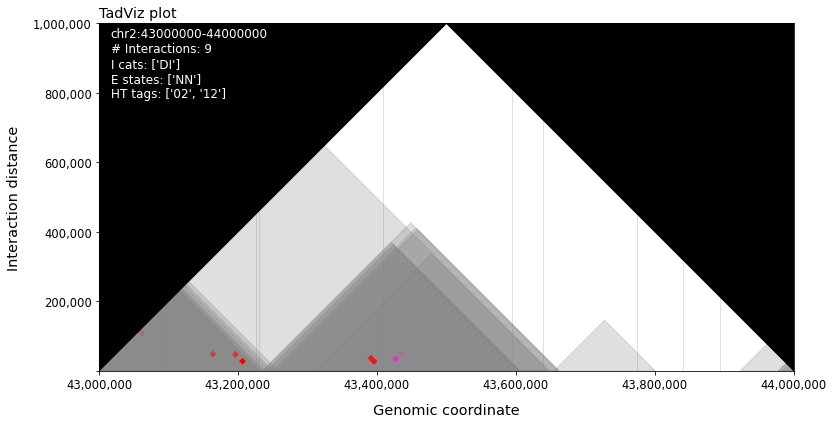

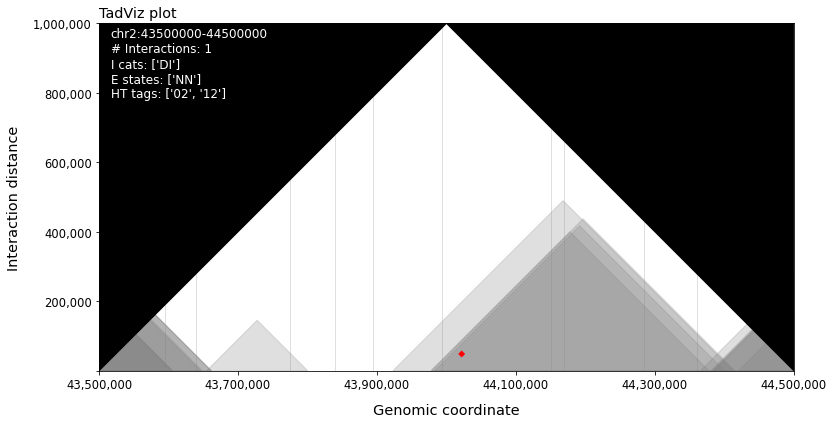

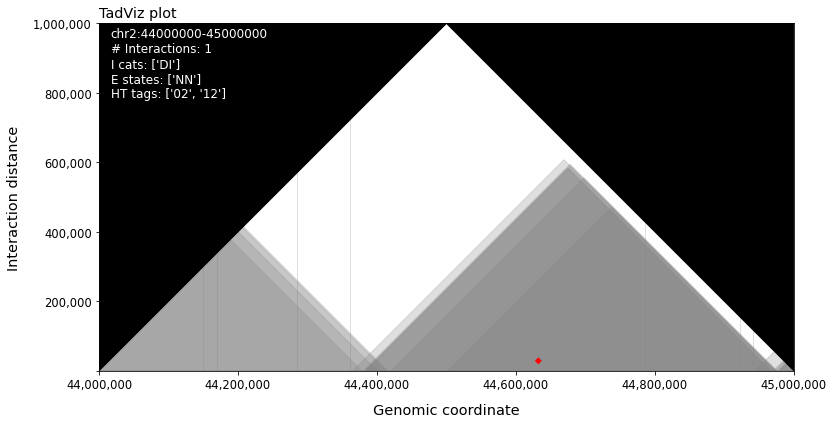

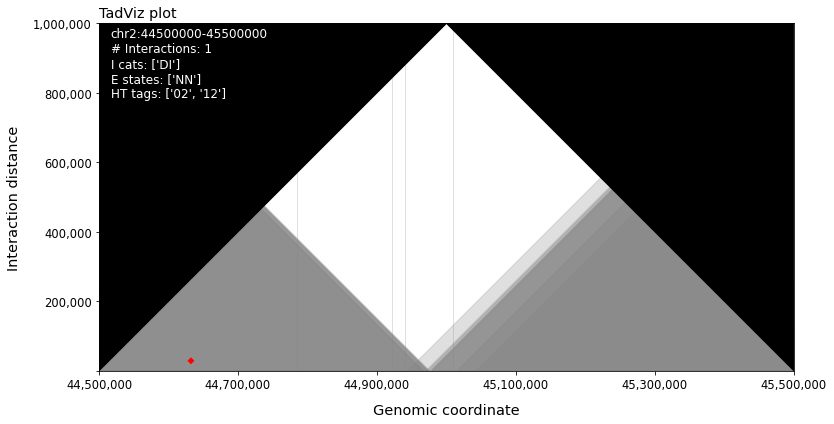

In [79]:
chrom = 'chr2'
from_pos = 43000000
to_pos = from_pos + 2000000
window_size = 1000000
shift_size = int(window_size/2)
d_radius = 5000
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DIX'],
                                    enr_cat_list = ['NN'],
                                    d_radius = d_radius,
                                    color_i_cats = False,
                                    verbose=False,
                                    ht_tag_list = ['02','12'])
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DI'],
                                    enr_cat_list = ['NN'],
                                    d_radius = d_radius,
                                    color_i_cats = False,
                                    verbose=False,
                                    ht_tag_list = ['02','12'])

This plot shows capture Hi-C interactions between `HindIII` restriction fragments. Because restriction fragments are of different lengths, the tetragons are rectangular. The data was not corrected for distance-dependent interaction frequencies, so that the interactions spread out from the baits to the left and right. The four interaction categories `DIX` (orangered), `DI` (orange), `UIR` (green) and `UI` (gray) are shown in different colors. Note that the `UI` interactions can hardely be recognized because they have the lowest read pair counts of the the interactions shown. The TAD regions are shown as transparent triangles in the background. In this case, we have loaded the file with the TAD regions from all eight cell types, so that a genomic region can be covered by several TADs. Due to the transparent display of TADs, the gray triangles over such regions are darker.

Alternatively, create one plot separately for each interaction category.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 5,303 interactions in range:
		chr11:74715230-76715230
[ERROR] After filtering, there are no interactions left to be visualized!
[INFO] Creating visualization ...
	[INFO] Extracted a total number of 5,303 interactions in range:
		chr11:74715230-76715230
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI']
		[INFO] Enrichment status:
			['NE']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			85
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 47.   60.   68.   80.2 103.  119.4 145.  171.8 253.8 821. ]
[INFO] ... done.
[INFO] Creating visualization ...
	[INFO] Extracted a total number of 5,303 interactions in range:
		chr11:74715230-76715230
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['UIR']
		[INFO] Enrichment status:
			['NE']
		

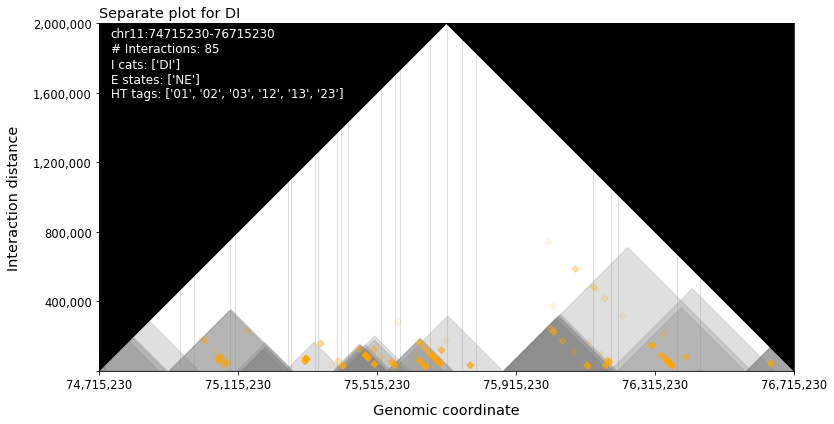

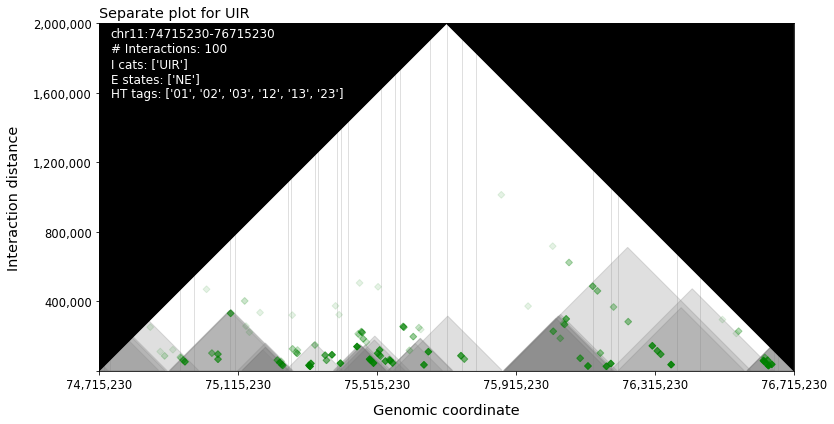

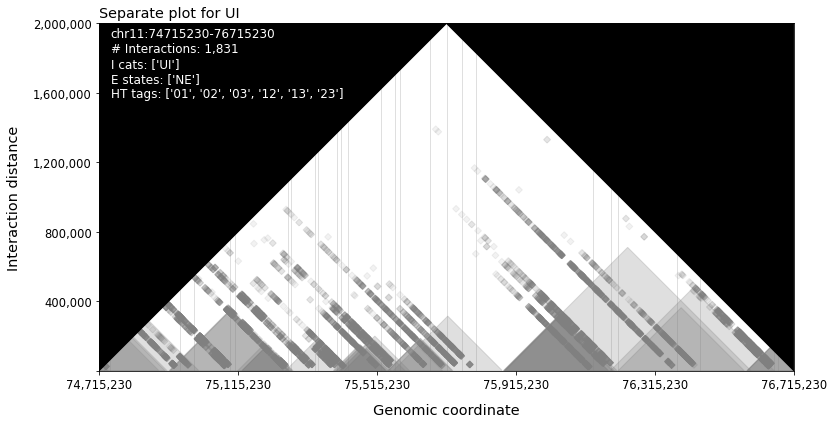

In [86]:
for i_cat in ['DIX','DI','UIR','UI']:
    TadViz_plot = visualizer.create_visualization(
                                    chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = [i_cat],
                                    enr_cat_list = ['NE'],
                                    d_radius = d_radius,
                                    plot_title = 'Separate plot for ' + i_cat)

`DI` and `UIR` are comparable -> Show in one plot

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 4,837 interactions in range:
		chr3:122026219-124026219
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			321
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 20.  30.  48.  60.  78.  96. 123. 154. 218. 690.]
[INFO] ... done.


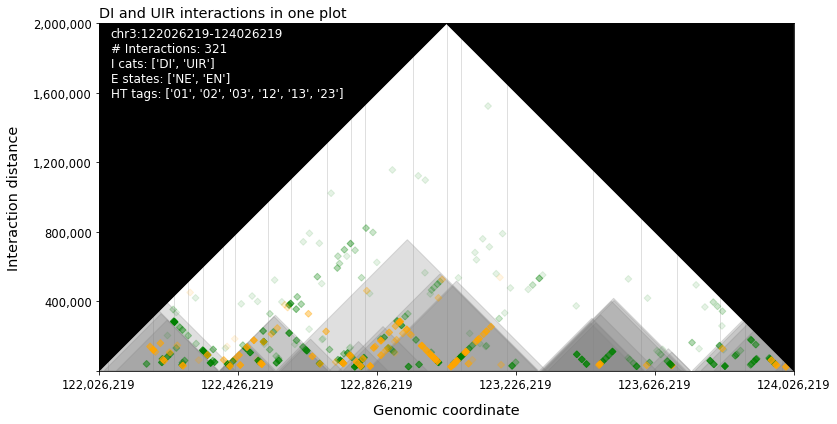

In [56]:
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI', 'UIR'],
                                enr_cat_list = ['NE','EN'],
                                d_radius = d_radius,
                                plot_title = 'DI and UIR interactions in one plot')

#### Slide a window along the genome

So far, we have only looked at one region. The following codes moves a window of width `2,000,000` bp along the genome and generates a plot for each window position. We restrict to the interaction categories `DI` and `UIR` and the enrichment state `EN`.

Creating plots for: chr2:110000000-112000000
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plots for: chr2:111000000-113000000
Creating plots for: chr2:112000000-114000000
Creating plots for: chr2:113000000-115000000
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plots for: chr2:114000000-116000000
[ERROR] After filtering, there are no interactions left to be visualized!


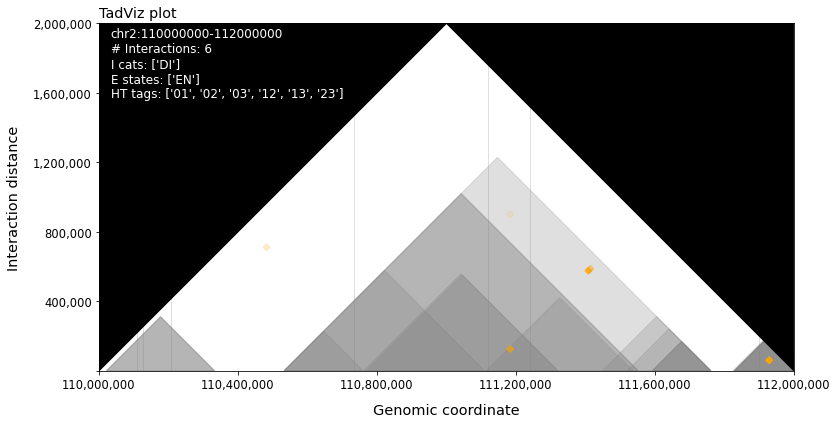

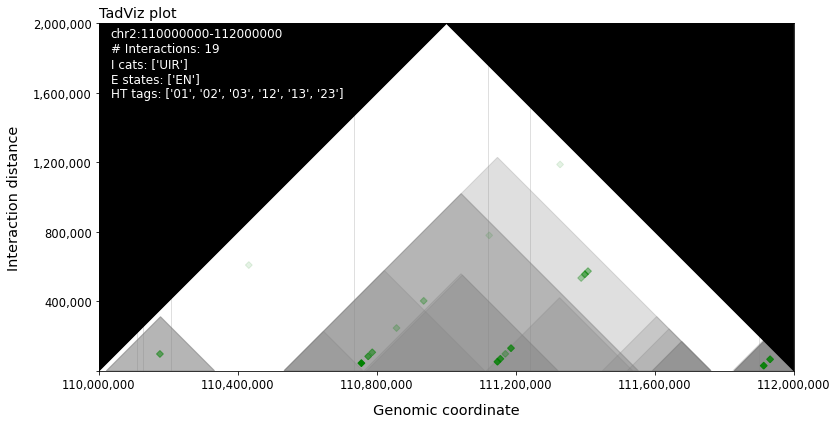

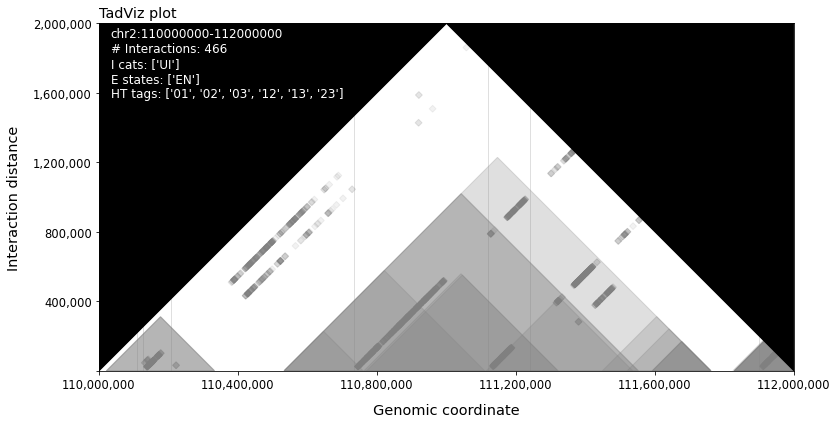

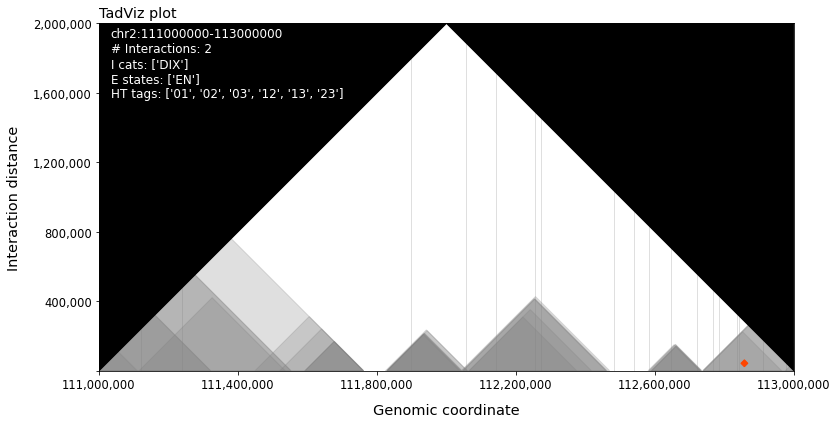

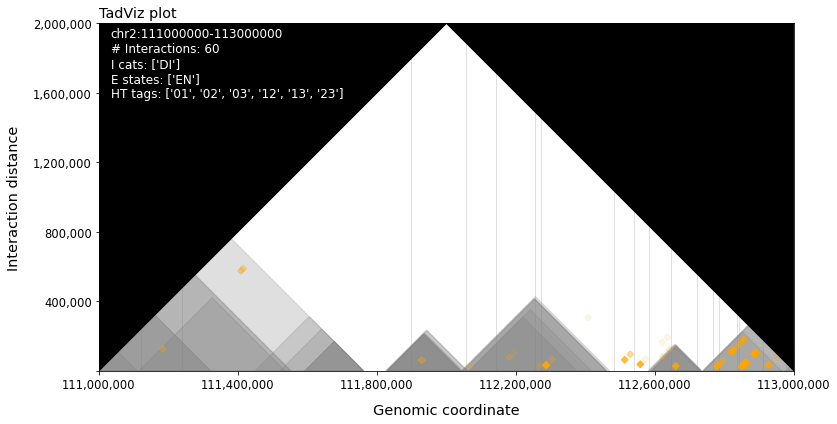

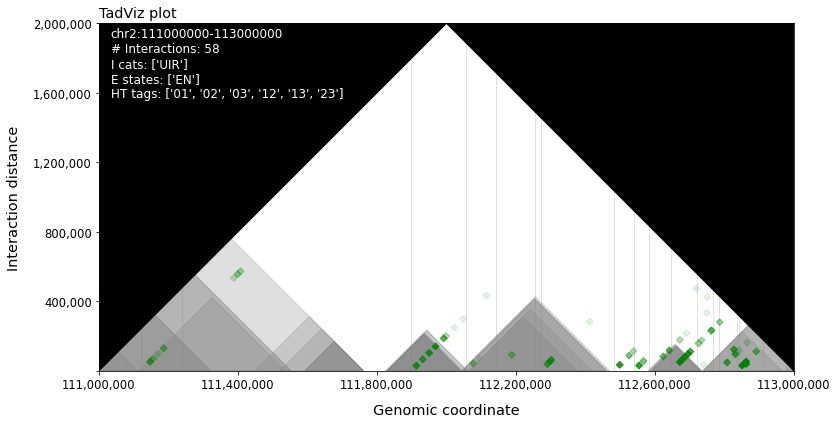

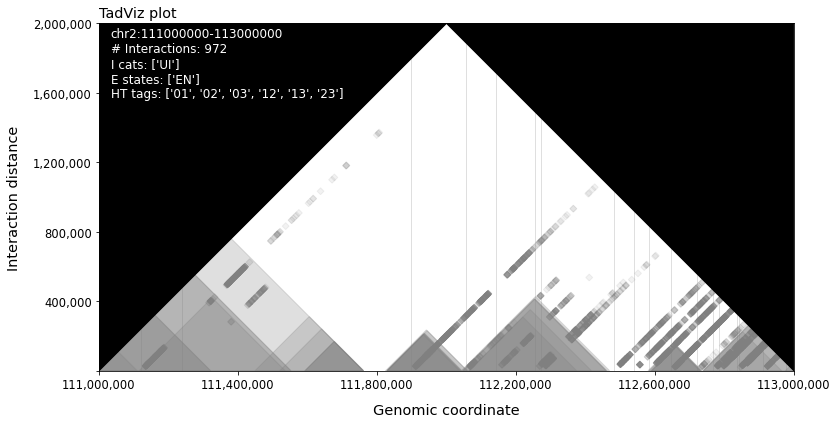

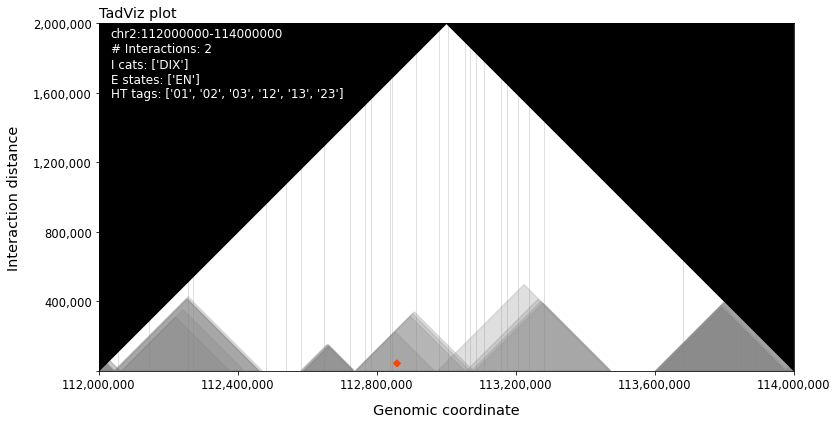

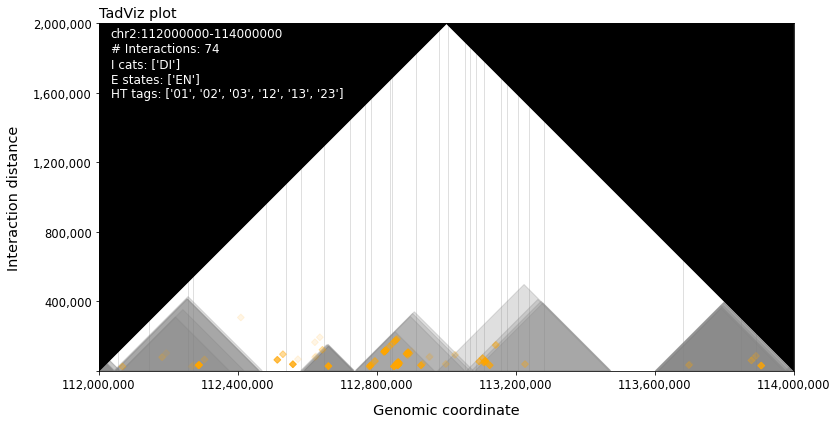

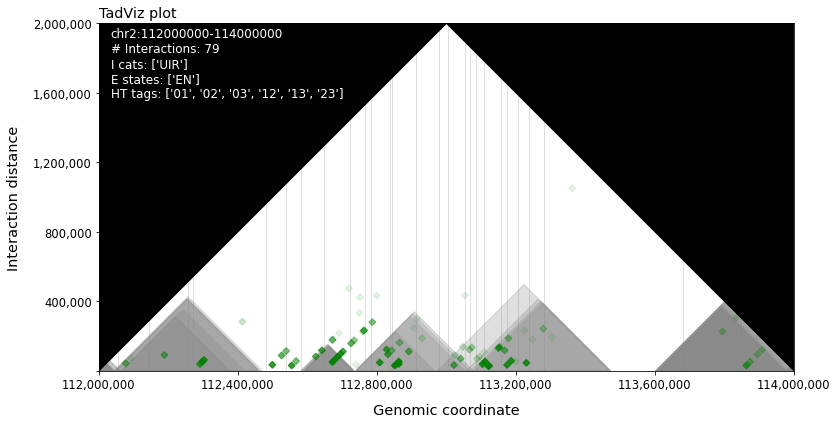

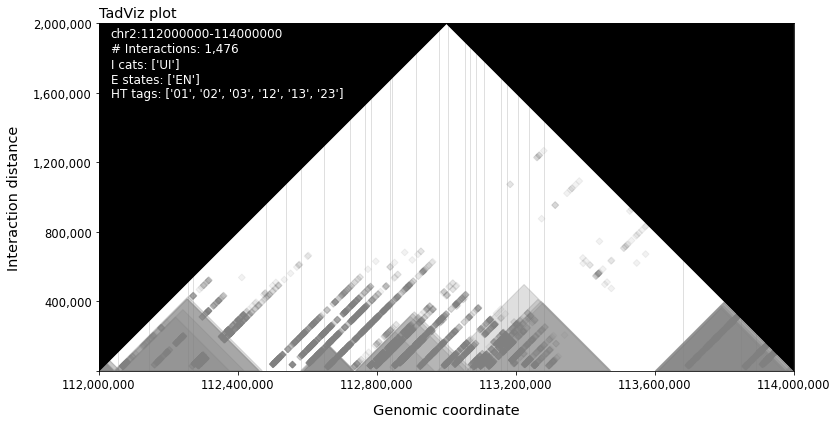

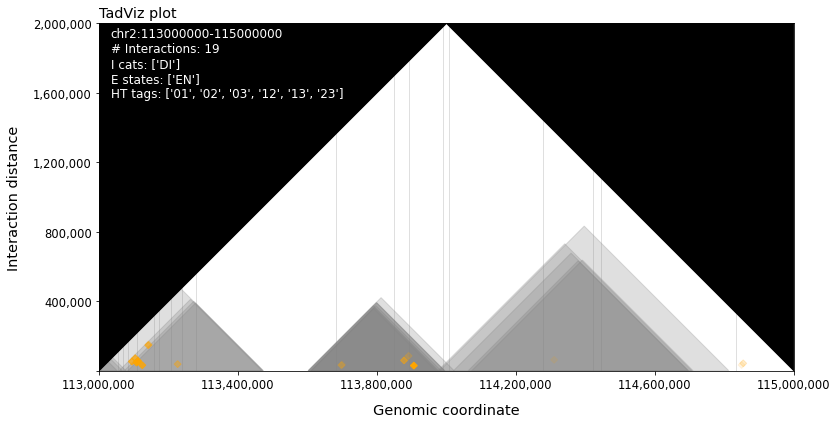

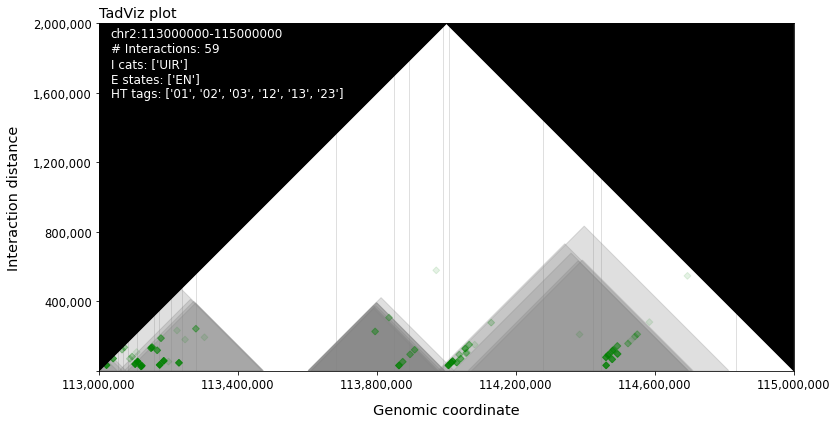

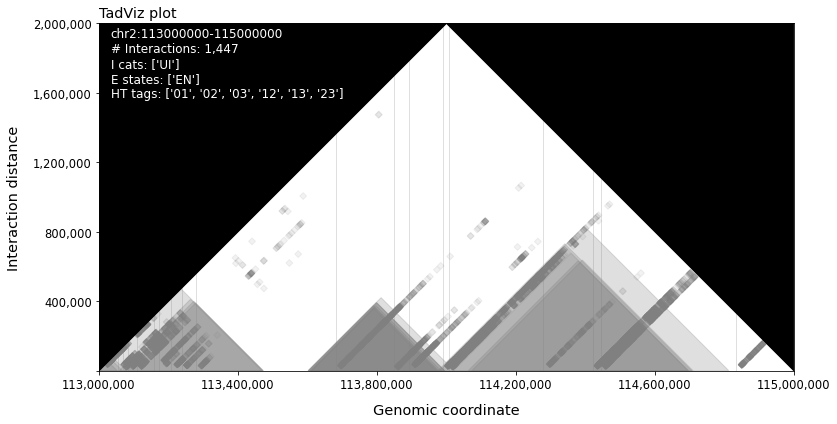

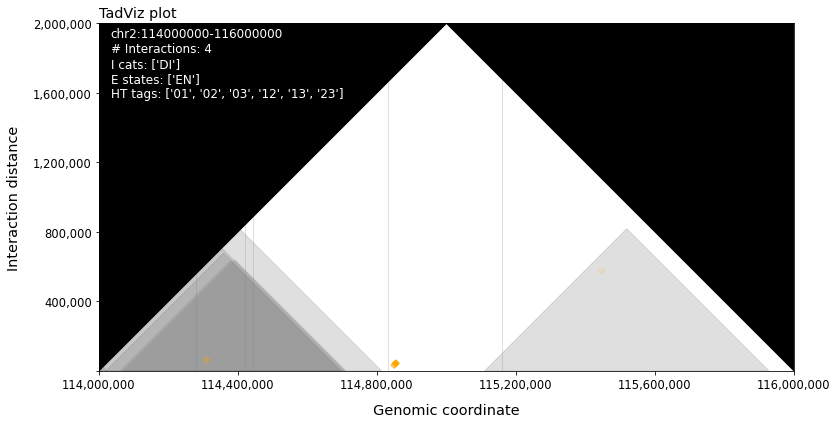

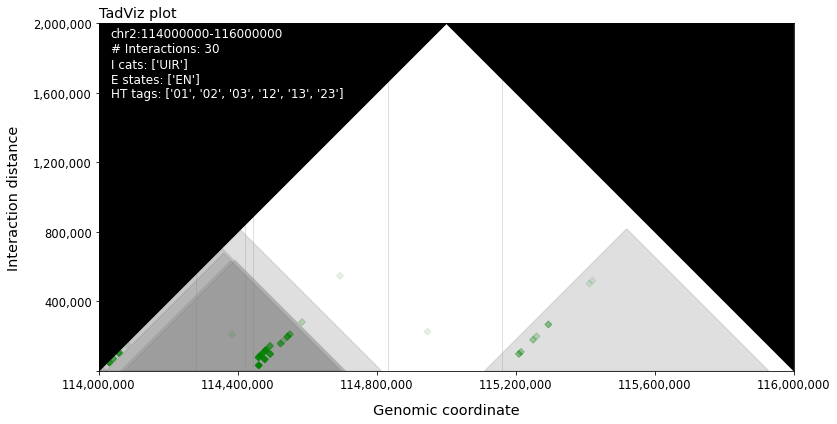

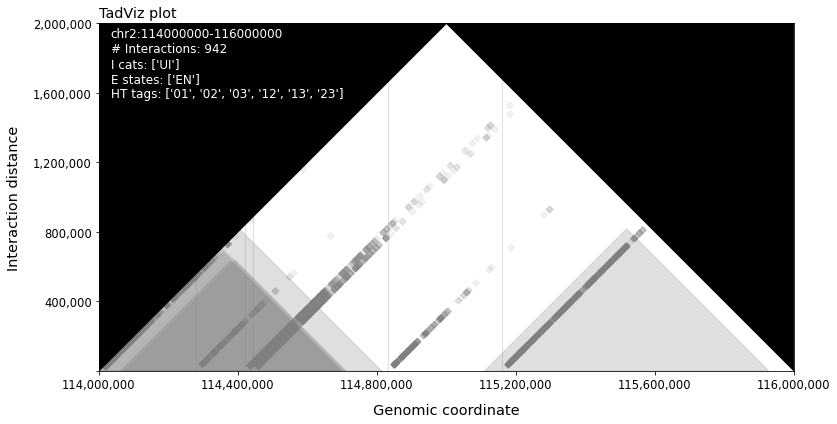

In [87]:
enr_cats = ['EN']
chrom = 'chr2'
from_pos = 110000000
to_pos = from_pos + 5000000
window_size = 2000000
shift_size = int(window_size/2)
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DIX'],
                                    enr_cat_list = enr_cats,
                                    d_radius = d_radius,
                                    verbose=False)
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DI'],
                                    enr_cat_list = enr_cats,
                                    d_radius = d_radius,
                                    verbose=False)
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['UIR'],
                                    enr_cat_list = enr_cats,
                                    d_radius = d_radius,
                                    verbose=False)
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['UI'],
                                    enr_cat_list = enr_cats,
                                    d_radius = d_radius,
                                    verbose=False)

### Compare HT tags

If `color_i_cats=False`, then the interaction are colored according to their HT tags. The colors were assigned as follows:

```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```

We had already seen that unbalanced interactions with the HT tags `03` and `12` go more often from the bait to the left (`NE`), whereas interactions with the tags `02` and `13` go more often from the bait to the right (`EN`). For balanced interaction. For balanced interactions, we did not make this observation.

```
DI
['02', '13'] -> red, blue ->  -> from the baits to the left (EN)
['03', '12'] -> lime, magenta -> from the baits to the right (NE)
UIR
['02', '13'] -> red, blue ->  -> from the baits to the left (NE) and right (EN)
['03', '12'] -> lime, magenta -> from the baits to the left (NE) and right (EN)

```

Now we want to check whether this observation is also reflected in the TadViz-Plots. For this purpose, we did two analyzes:

1. For each inteaction category, plot `NE` and `EN` interactions separately. If the HT tags `02` (red) and `13` (blue) predominate for `EN` interactions and the HT tags `03` (lime) and `12` (magenta) predominate for `NE` interactions, then the previous obervation is reflected in the TadViz plots.
2. For the second analysis, we go the opposite way. For each interaction category, we plot both `NE` and `EN` interactions, but either only interactions with the HT tags `03` (lime) and `12` (magenta) or only interactions with the HT tags `02` (red) and `13` (blue). If the `NE` interactions predominate in the interactions with the HT tags `03` (lime) and `12` (magenta) and the `EN` interactions in the iteractions with the HT tags `02` (red) and `13` (blue), then the previous observation is also reflected in the TadViz plots.

#### For each inteaction category, plot `NE` and `EN` interactions separately (1)

Create two times eight PDFs for one region.

In [13]:
chrom = 'chr1'
begin = 23000000
end = 25000000
pdf_file_name_prefix = 'TadViz_ht_tag_' + chrom + ':' + str(begin) + '-' + str(end)
d_radius = 5000
#### BALANCED BAITED DIGESTS
#center_pos = 26993459
#chrom = 'chr1'
#begin = center_pos - 500000
#end = center_pos + 500000

Creating plot for: chr1:23000000-25000000
	e_cat: NE
		i_cat: DIX
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: DI
		i_cat: UIR
		i_cat: UI
	e_cat: EN
		i_cat: DIX
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: DI
		i_cat: UIR
		i_cat: UI


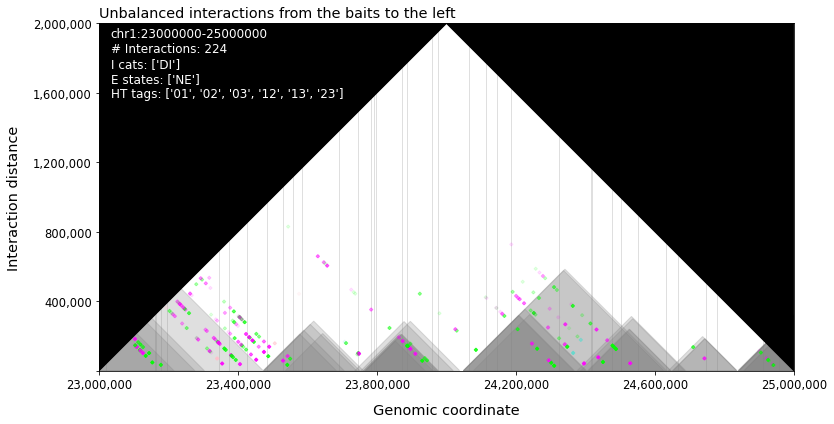

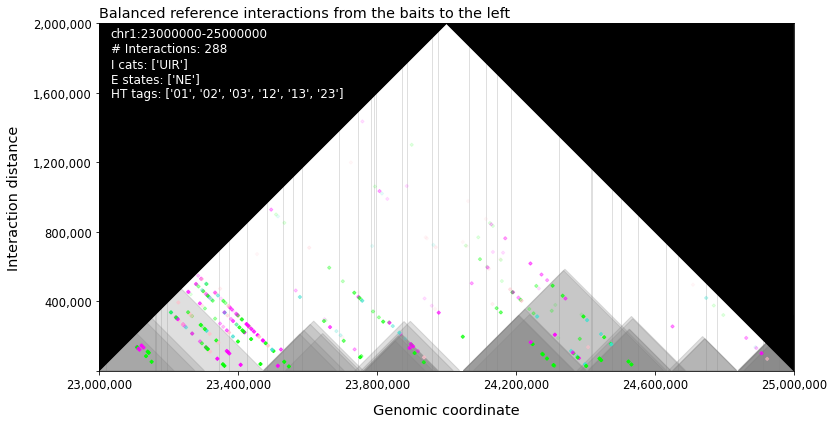

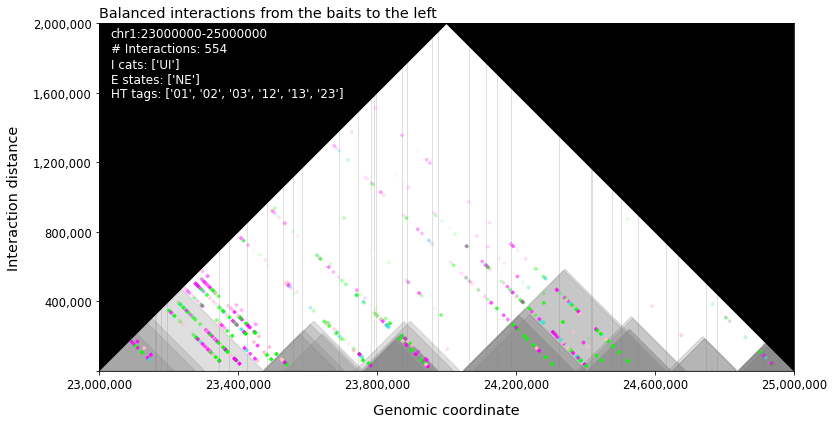

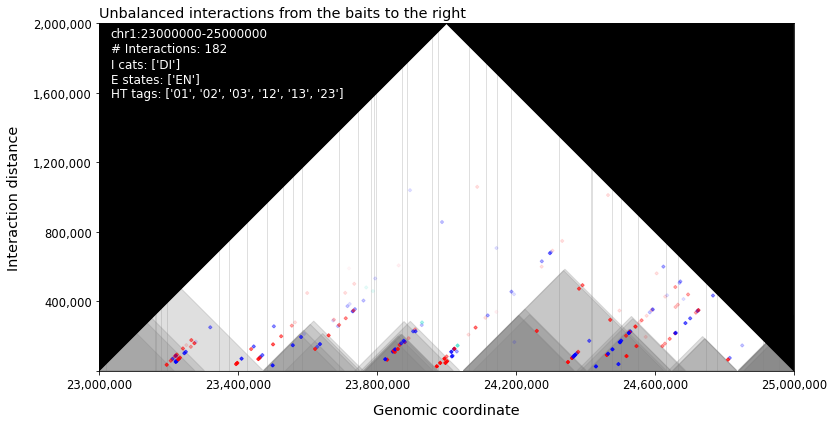

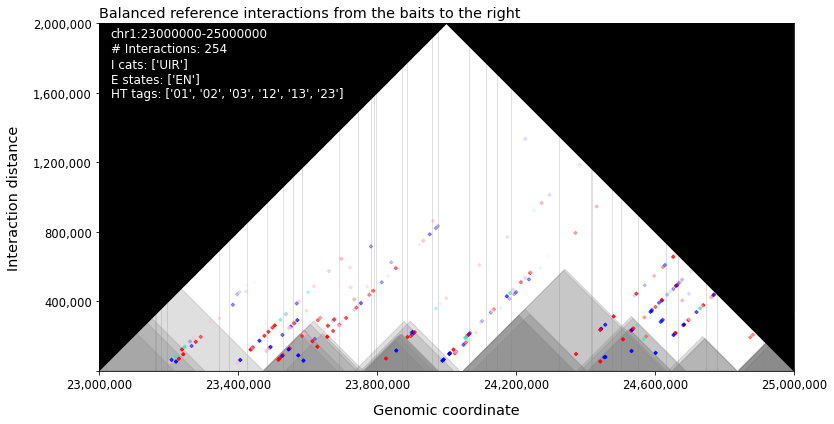

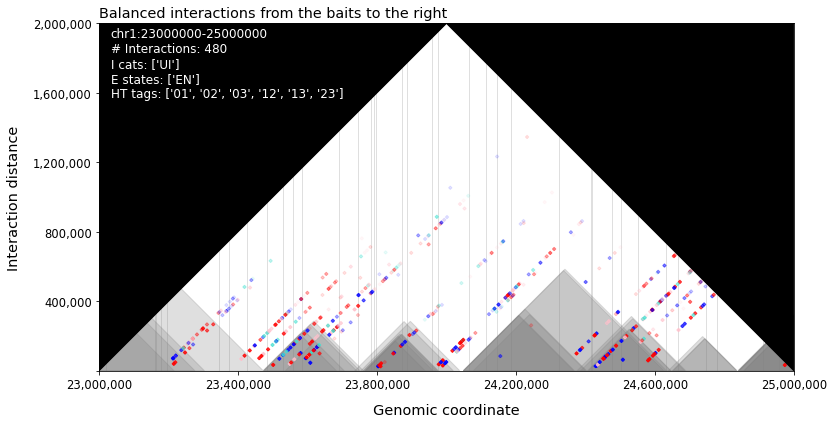

In [14]:
print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
for e_cat in ['NE', 'EN']:
    print("\te_cat: " + e_cat)
    for i_cat in ['DIX', 'DI', 'UIR', 'UI']:
        print("\t\ti_cat: " + i_cat)
        if i_cat == 'DIX':
            plot_title = 'Unbalanced interactions without reference'
        if i_cat == 'DI':
            plot_title = 'Unbalanced interactions'
        if i_cat == 'UIR':
            plot_title = 'Balanced reference interactions'
        if i_cat == 'UI':
            plot_title = 'Balanced interactions'
        if e_cat == 'NE':
            plot_title = plot_title + ' from the baits to the left'
        if e_cat == 'EN':
            plot_title = plot_title + ' from the baits to the right'
        TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = [i_cat],
                                        enr_cat_list = [e_cat],
                                        color_i_cats=False,
                                        d_radius = d_radius,
                                        plot_title = plot_title,
                                        pdf_file_name = pdf_file_name_prefix + '_' + e_cat + '_' + i_cat + '.pdf',
                                        verbose=False)

#### For each inteaction category, plot `NE` and `EN` interactions but separately for HT tags `('02', '13')`  and `('12', '03')`  (2)

Create two times eight PDFs for one region.

Creating plots for: chr1:23000000-25000000
	ht_tags: ['02', '13']
		i_cat: DIX
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: DI
		i_cat: UIR
		i_cat: UI
	ht_tags: ['12', '03']
		i_cat: DIX
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: DI
		i_cat: UIR
		i_cat: UI


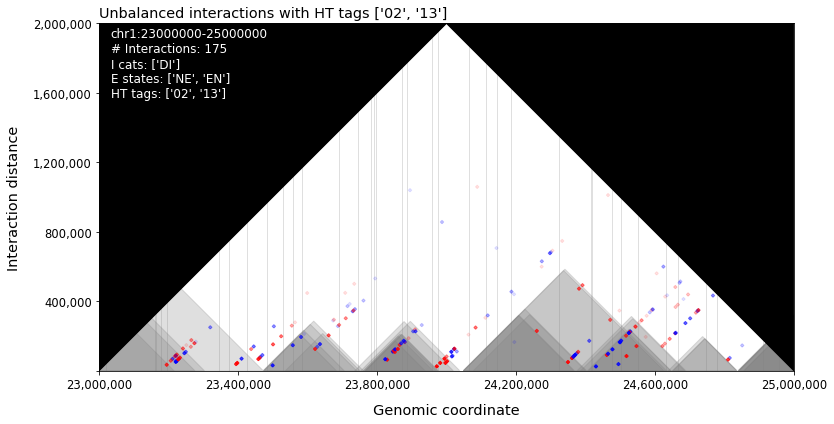

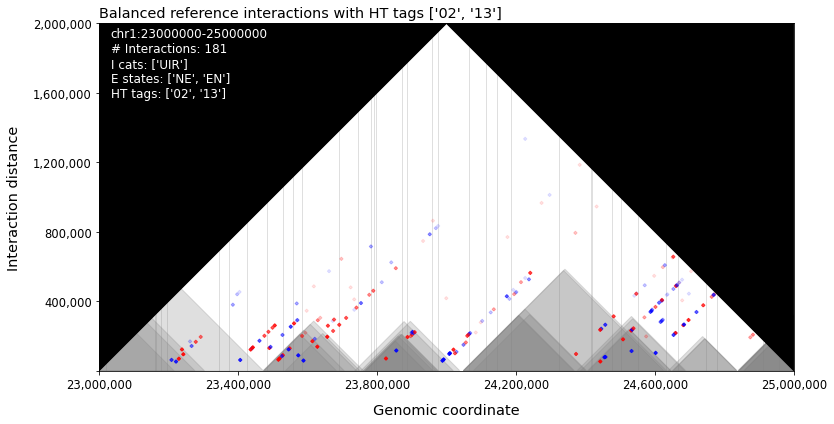

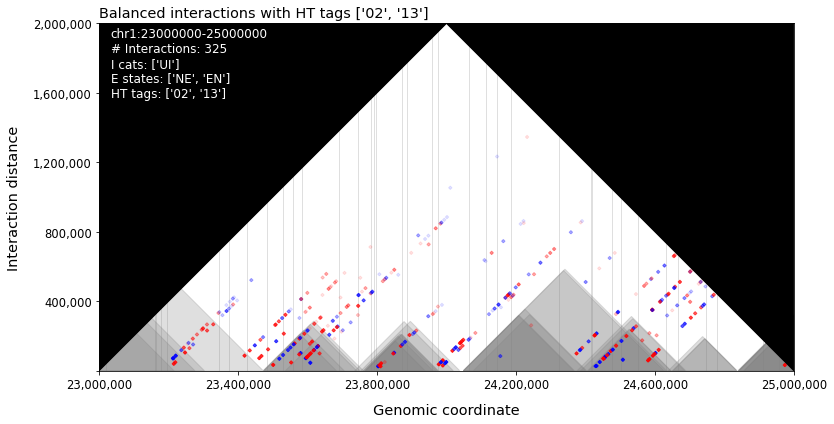

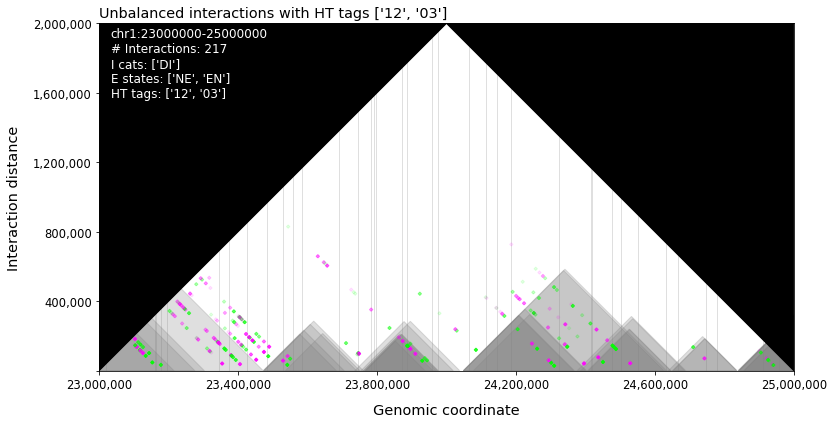

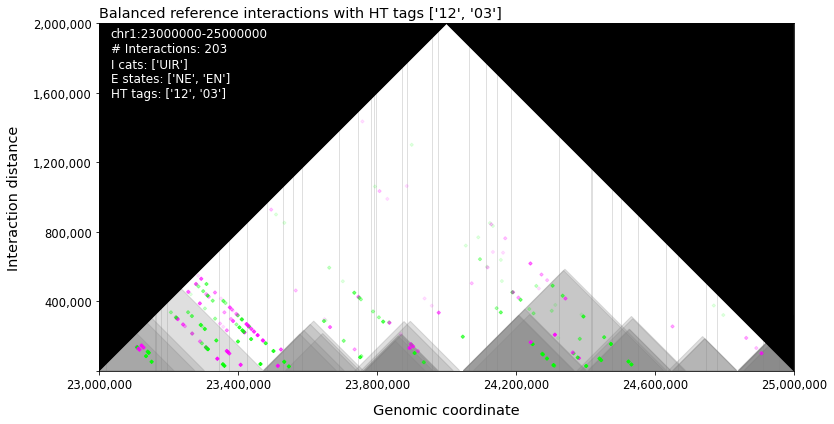

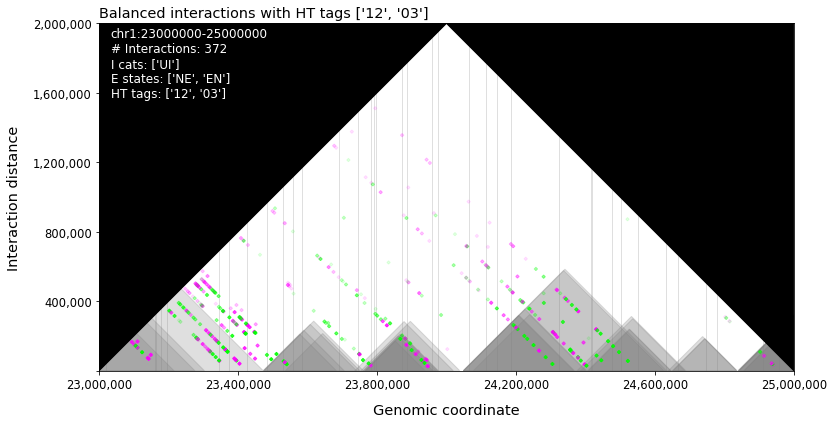

In [15]:
print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
for ht_tag_list in [['02', '13'], ['12', '03']]:
    print("\tht_tags: " + str(ht_tag_list))
    for i_cat in ['DIX', 'DI', 'UIR', 'UI']:
        print("\t\ti_cat: " + i_cat)
        if i_cat == 'DIX':
            plot_title = 'Unbalanced interactions without reference'
        if i_cat == 'DI':
            plot_title = 'Unbalanced interactions'
        if i_cat == 'UIR':
            plot_title = 'Balanced reference interactions'
        if i_cat == 'UI':
            plot_title = 'Balanced interactions'
        TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = [i_cat],
                                        enr_cat_list = ['NE','EN'], # enr_cat_list = ['NE'],
                                        ht_tag_list = ht_tag_list,
                                        color_i_cats = False,
                                        d_radius = d_radius,
                                        plot_title = plot_title + ' with HT tags ' + str(ht_tag_list), 
                                        pdf_file_name = pdf_file_name_prefix + '_' + str(ht_tag_list) + '_' + i_cat + '.pdf',
                                        verbose=False)

#### Slide a window along the genome

Open BED file with baited digests in UCSC genome browser and find regions with high density of baits.

```
chr1:22500000-27500000
chr10:68750000-71250000
chr2:8750000-11250000
chr2:10000000-12500000
chr2:10000000-12000000
chr2:25000000-27000000
```

Creating plot for: chr1:168000000-170000000
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
	ht_tags: ['12', '03']
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:169000000-171000000
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
	ht_tags: ['12', '03']
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:170000000-172000000
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
	ht_tags: ['12', '03']
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:171000000-173000000
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left t

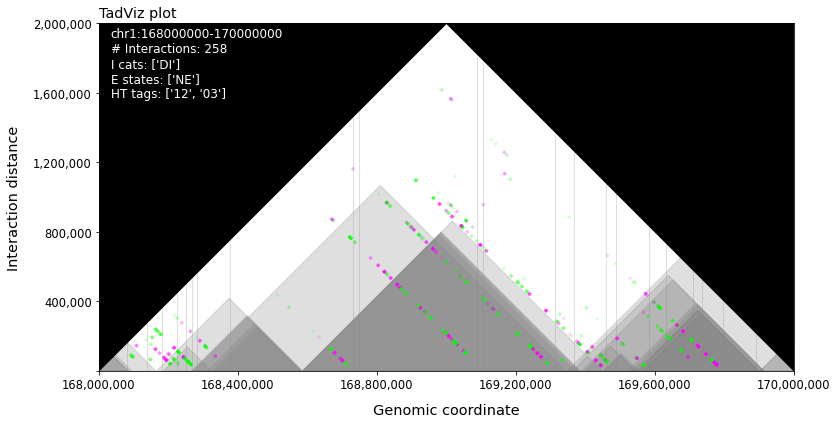

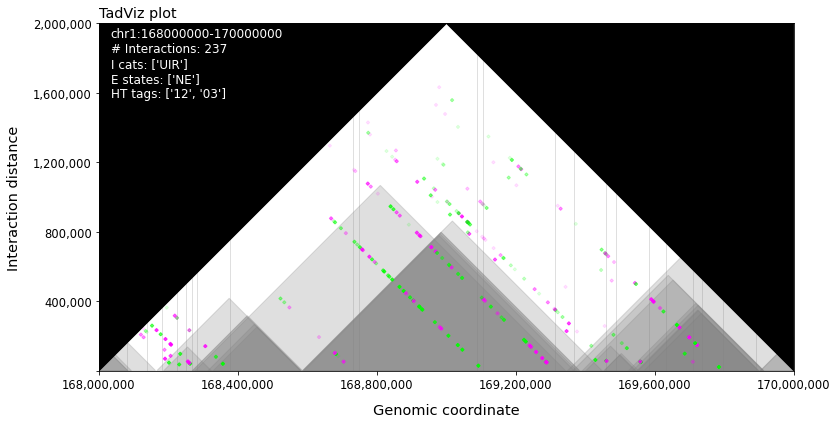

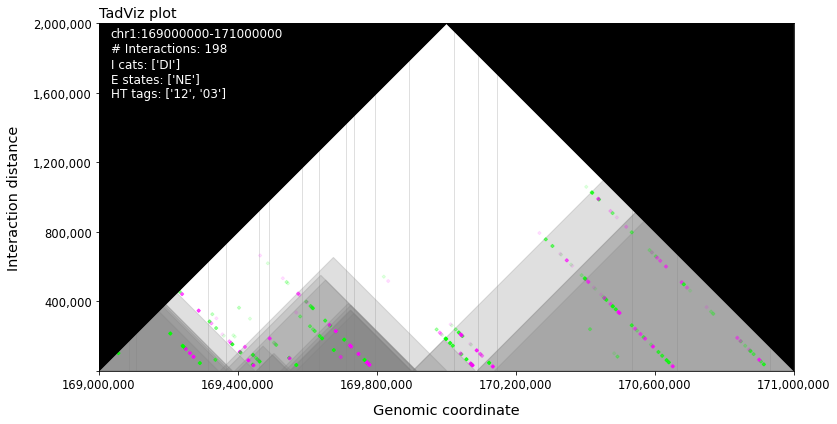

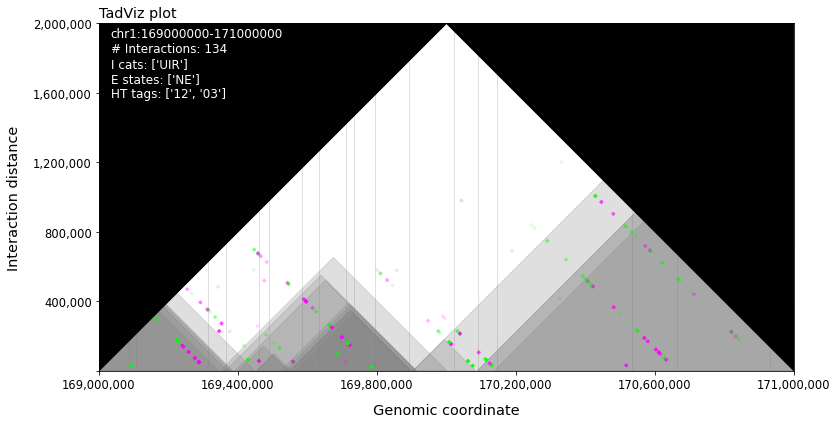

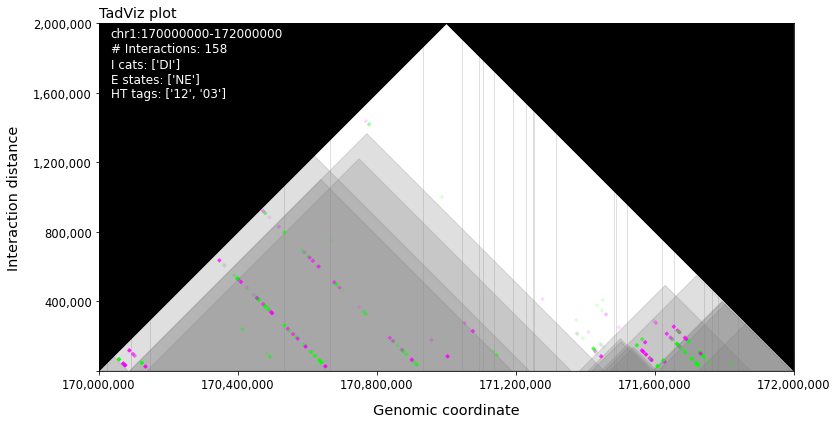

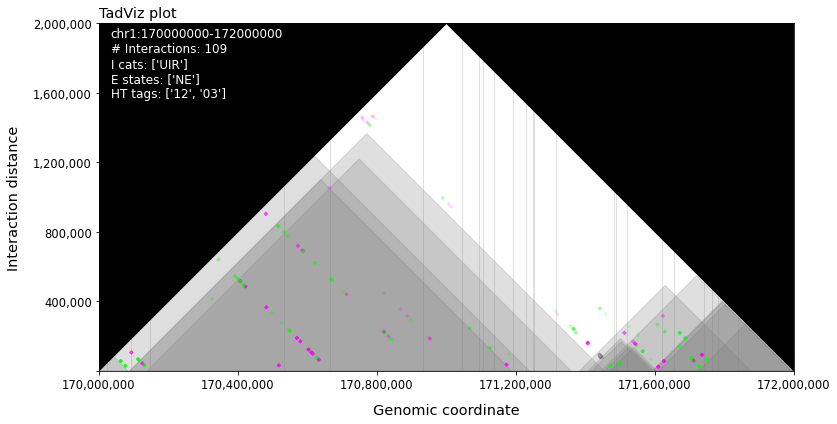

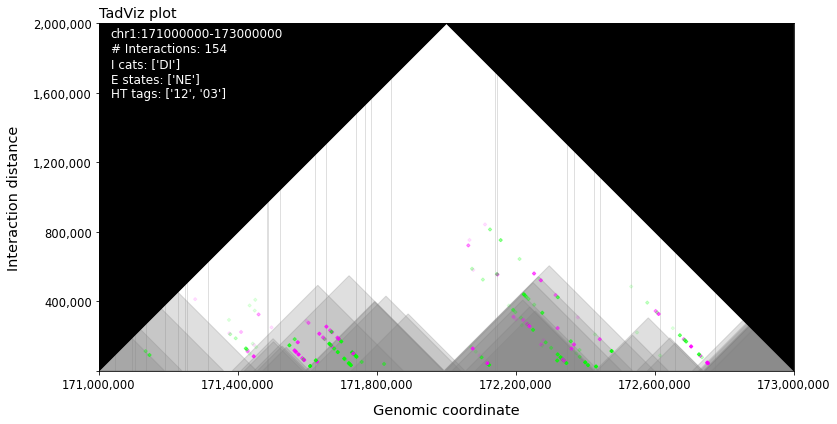

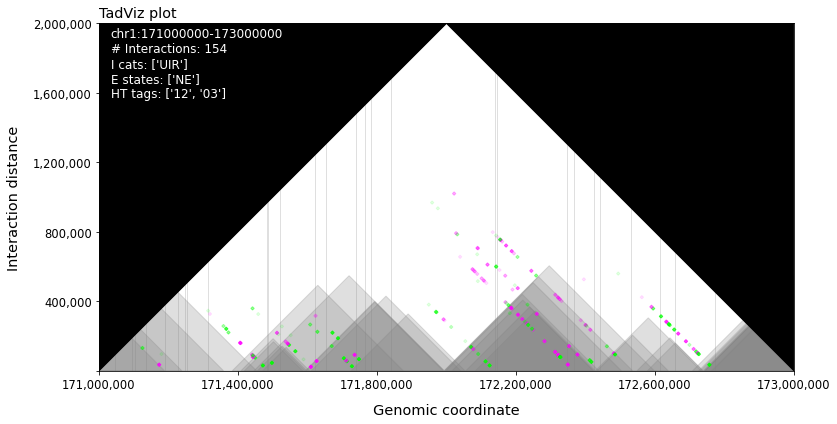

In [16]:
#chr1:154,795,996-157,036,109
chrom = 'chr1'
from_pos = 168000000
to_pos = from_pos + 4000000
window_size = 2000000
shift_size = int(window_size/2)
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
    for ht_tag_list in [['02', '13'], ['12', '03']]:
        print("\tht_tags: " + str(ht_tag_list))
        for i_cat in ['DI', 'UIR']:
            print("\t\ti_cat: " + i_cat)
            TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                            begin = begin,
                                            end = end,
                                            inter_cat_list = [i_cat],
                                            enr_cat_list = ['NE'],
                                            ht_tag_list = ht_tag_list,
                                            color_i_cats=False,
                                            d_radius = d_radius,
                                            verbose=False)

Creating plot for: chr1:168000000-170000000
	e_cat: NE
		i_cat: DI
		i_cat: UIR
	e_cat: EN
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:169000000-171000000
	e_cat: NE
		i_cat: DI
		i_cat: UIR
	e_cat: EN
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:170000000-172000000
	e_cat: NE
		i_cat: DI
		i_cat: UIR
	e_cat: EN
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:171000000-173000000
	e_cat: NE
		i_cat: DI
		i_cat: UIR
	e_cat: EN
		i_cat: DI
		i_cat: UIR


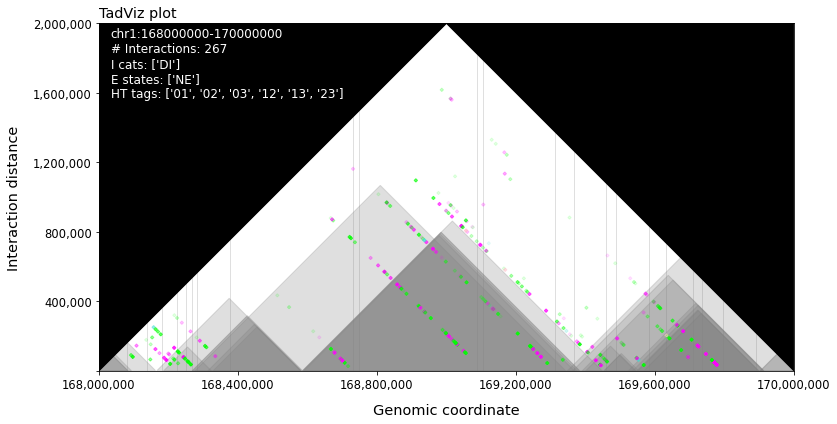

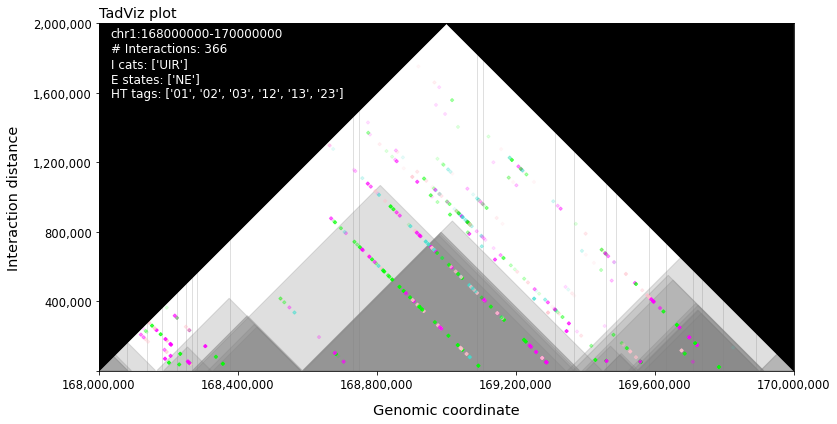

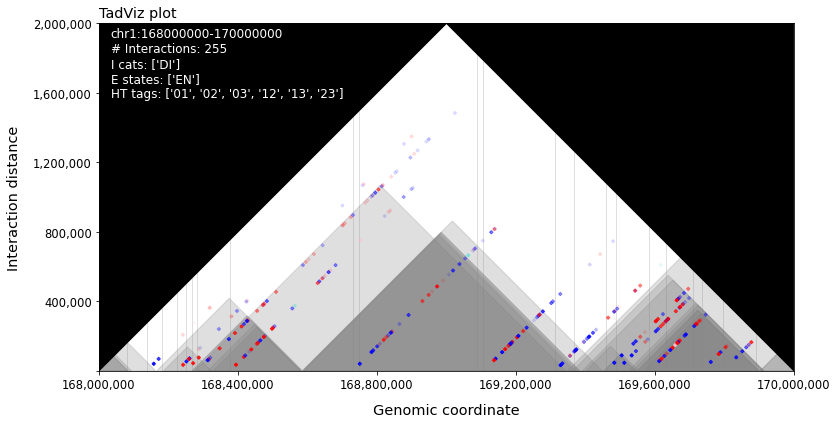

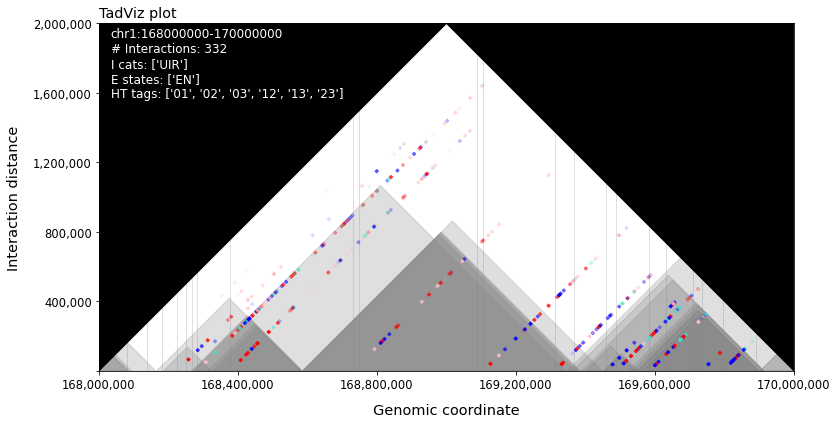

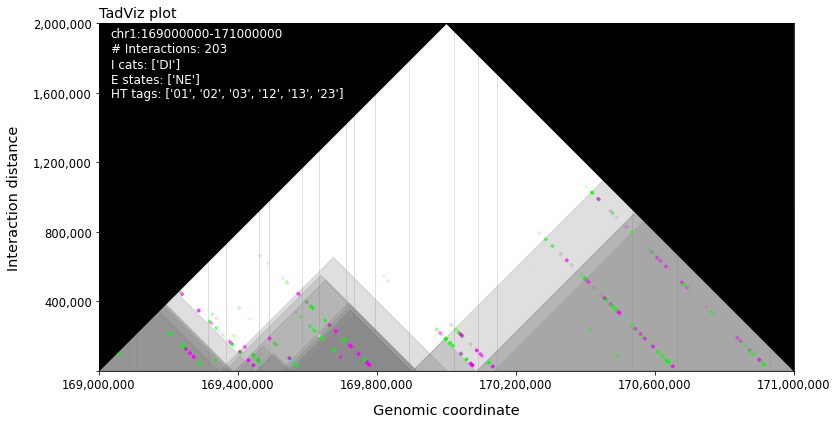

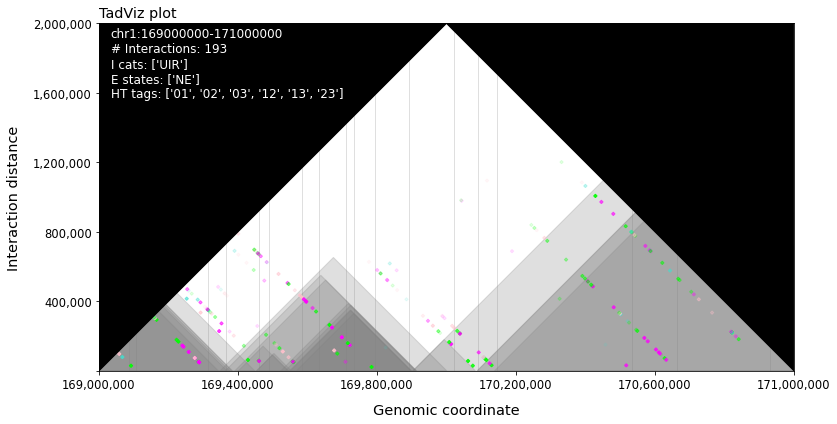

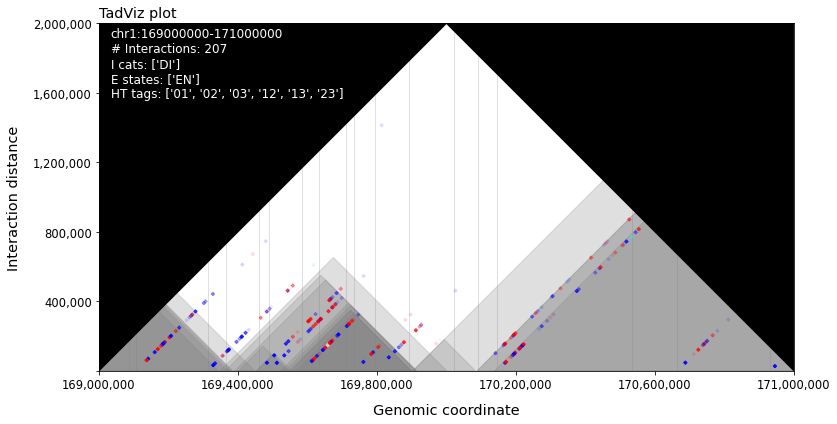

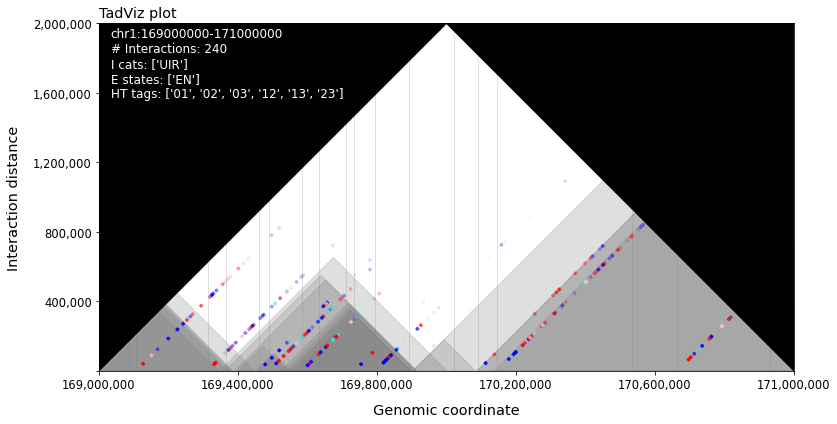

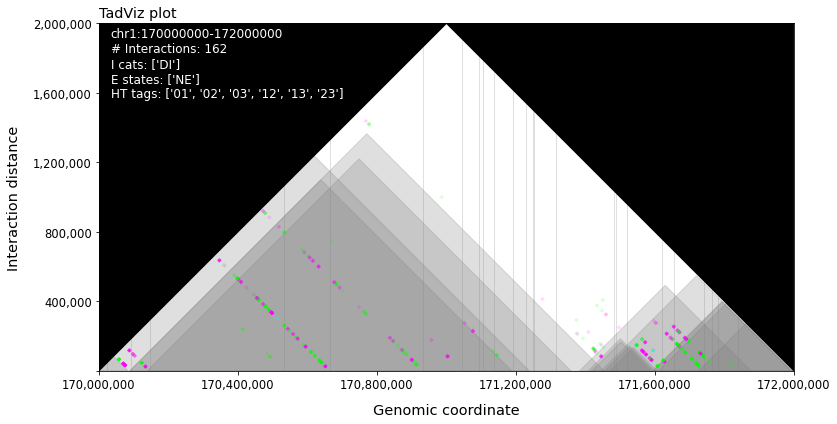

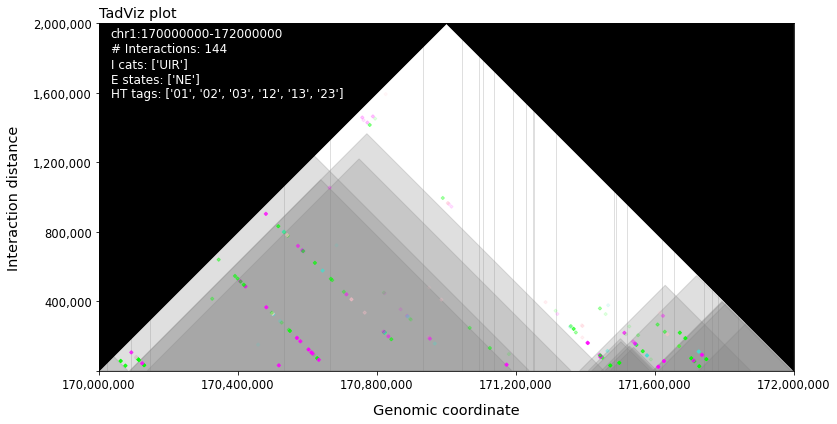

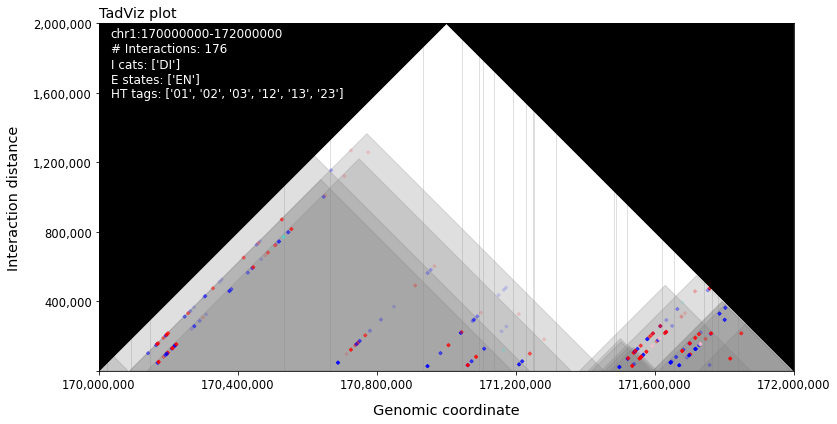

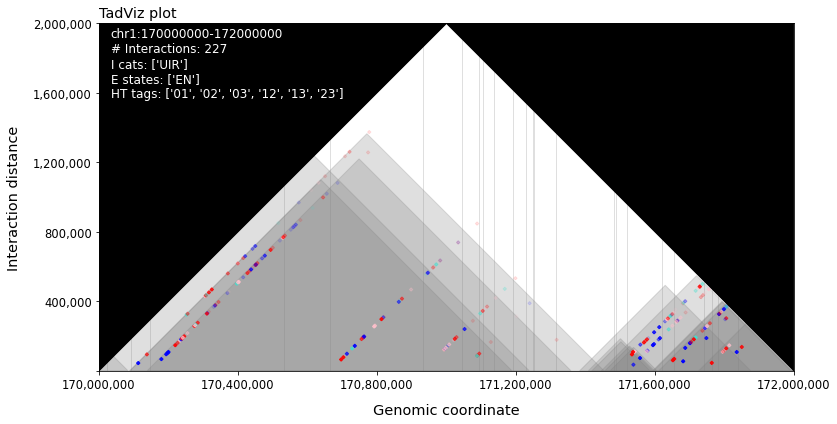

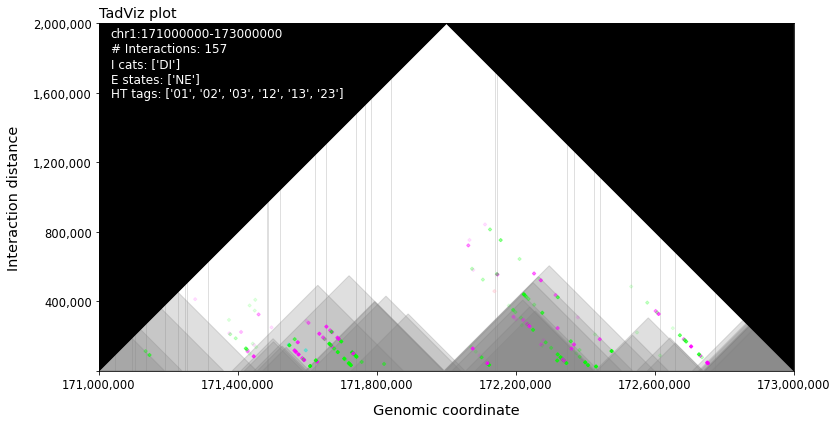

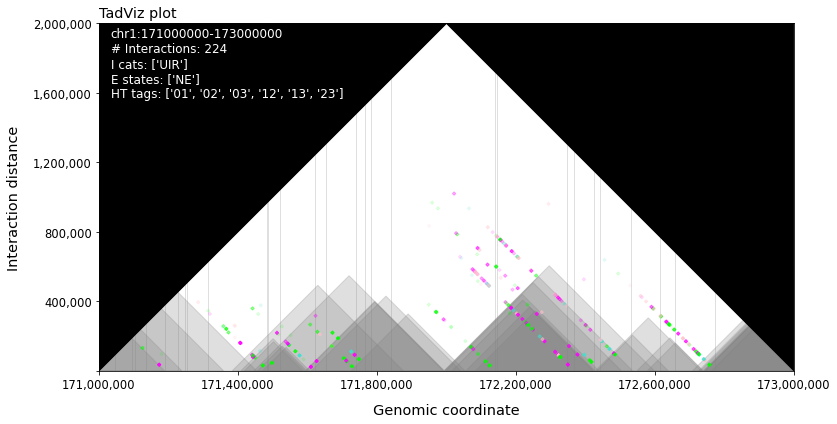

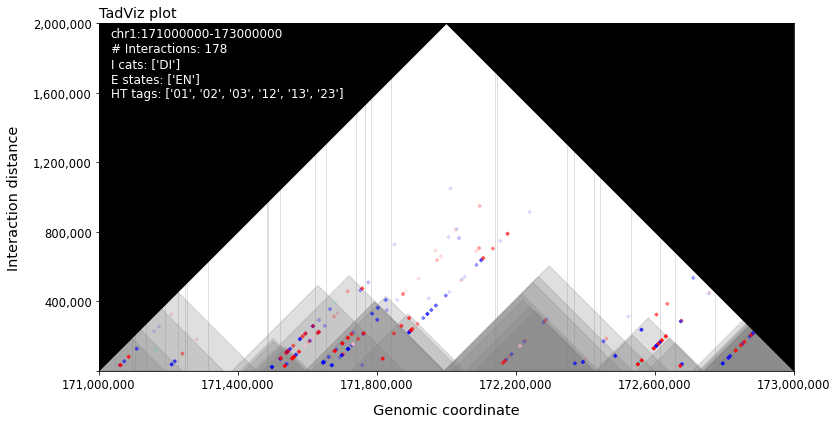

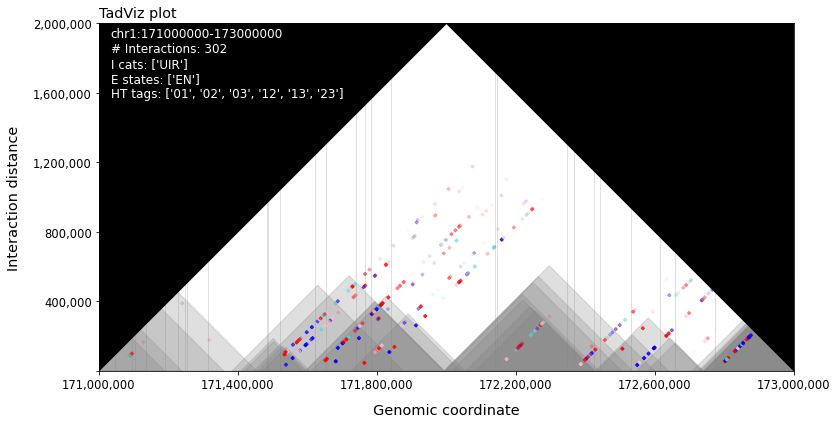

In [17]:
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
    for e_cat in ['NE', 'EN']:
        print("\te_cat: " + e_cat)
        for i_cat in ['DI', 'UIR']:
            print("\t\ti_cat: " + i_cat)
            TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                            begin = begin,
                                            end = end,
                                            inter_cat_list = [i_cat],
                                            enr_cat_list = [e_cat],
                                            ht_tag_list = ['01', '02', '03', '12', '13', '23'],
                                            color_i_cats=False,
                                            d_radius = d_radius,
                                            verbose=False)

### Possible plots for publication

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 1,465 interactions in range:
		chr10:12500000-14500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI']
		[INFO] Enrichment status:
			['NE', 'EN', 'EE', 'NN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			294
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 12.   16.   19.   24.   29.   33.   40.   52.   67.4 583. ]
[INFO] ... done.


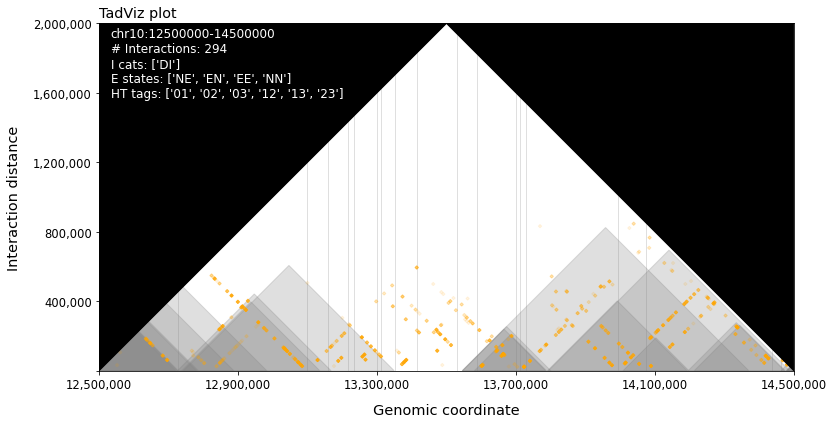

In [18]:
chrom = 'chr10'
begin = 12500000
end = begin + 2000000

TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI'],
                                d_radius = d_radius,
                                color_i_cats = True)